# Neural Networks Classification

In [55]:
# https://www.pluralsight.com/guides/deep-learning-model-perform-binary-classification
# Import Data
import pandas as pd
df = pd.read_csv('Group16_ClassificationData.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
# Splitting data set into train and test using Feature Matrix and Dependent Vector
properties = list(df.columns.values)
properties.remove('Outcome') # remove the outcome
print(properties)
X = df[properties]
y = df['Outcome'] # y vector is the Outcome

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [57]:
# The next step will be to divide the data into test and train sets. This is achieved using test_train_split function provided 
# in the model_selection class of sklearn module. 80% train, 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [58]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # arrange data into standard normal distribution (mean = 0, unit variance) -- improves accuracy
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [59]:
# Model Creation
# The below code creates a Neural Network that has three layers. There are two layers of 16 nodes each and one output node. 
# The last node uses the sigmoid activation function. The other two layers use ReLU (Rectified Linear Units) as the activation function.
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)), # needs to be 8 because of 8 features in data
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [60]:
# Model compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=1)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/50
614/614 [==============================] - 1s 1ms/step - loss: 0.5664 - accuracy: 0.7003
Epoch 2/50
614/614 [==============================] - 1s 1ms/step - loss: 0.4809 - accuracy: 0.7720
Epoch 3/50
614/614 [==============================] - 1s 1ms/step - loss: 0.4668 - accuracy: 0.7671
Epoch 4/50
614/614 [==============================] - 1s 1ms/step - loss: 0.4580 - accuracy: 0.7752
Epoch 5/50
614/614 [==============================] - 1s 1ms/step - loss: 0.4524 - accuracy: 0.7850
Epoch 6/50
614/614 [==============================] - 1s 1ms/step - loss: 0.4468 - accuracy: 0.7866
Epoch 7/50
614/614 [==============================] - 1s 1ms/step - loss: 0.4414 - accuracy: 0.7818
Epoch 8/50
614/614 [==============================] - 1s 1ms/step - loss: 0.4377 - accuracy: 0.7915
Epoch 9/50
614/614 [==============================] - 1s 983us/step - loss: 0.4324 - accuracy: 0.7883
Epoch 10/50
614/614 [==============================] - 1s 1ms/step - loss: 0.4290 - accuracy: 0.78

In [61]:
from sklearn.metrics import accuracy_score

# Now run predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print score/accuracy
train_accuracy = accuracy_score(y_train.round(), y_pred_train.round())
test_accuracy = accuracy_score(y_test.round(), y_pred_test.round())
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  0.8827361563517915
Test Accuracy:  0.7337662337662337


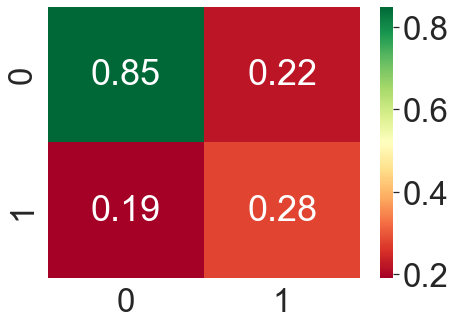

In [62]:
# Print Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize = (7,5))
sns.set(font_scale=3.0)
dataplot = sns.heatmap(confusion_matrix(y_test, y_pred_test.round())/100,annot=True, fmt='.2f', cmap='RdYlGn')

In [16]:
# Creating a visual of the Neural Network
from eiffel2 import builder
builder([8, 16, 16, 1 , 1], bmode='night')